# Run a batch from a configuration file

In [1]:
import sys
sys.path.append('../')  # uncomment to add the path to the onlineSG folder 
# You have to change the path if you move this file.
# Alternatevely add the onlineSG folder to your PYTHONPATH
# e.g. On Linux add this line on .bashrc:
# export PYTHONPATH="<absolute-path-to-onlineSG>:PYTHONPATH"
# then you can use onlineSG library from everywhere

In [2]:
import source.game as game
import source.player as player
import source.environment as environment
import source.errors as errors
import source.parsers as parsers
import source.players.attackers as attackers
import source.players.base_defenders as base_defenders
import source.players.defenders as defenders
import source.runner as runner


import numpy as np
import pandas as pd
from importlib import *

In [93]:
# if you change something in the files, don't forget to reload
reload(player)
reload(base_defenders)
reload(attackers)
reload(defenders)
reload(errors)
reload(runner)
reload(parsers)
reload(game)
reload(environment)

<module 'source.environment' from '/home/lorenzo/Scrivania/Polimi/Thesis/code/onlineSG/source/environment.py'>

write the configuration file

In [30]:
with open("../games/usd.csv", "w") as f:
    f.write("T,0,1,2,Defender,Attacker\n")
    #f.write("100,1,5,2,3,1,4,usd-fpl,stochastic_attacker1-0.1-0.3-0.3-0.1-0.1-0.1\n")
    #f.write("100,1,2,3,usd2-fpl,stochastic_attacker1-0.2-0.6-0.2\n")
    #f.write("100,1,2,3,usd-fpls,stochastic_attacker1-0.2-0.6-0.2\n")
    #f.write("100,1,2,3,usd2-fpls,stochastic_attacker1-0.2-0.6-0.2\n")
    #f.write("100,1,5,2,3,1,4,usd-wm,stochastic_attacker1-0.1-0.3-0.3-0.1-0.1-0.1\n")
    #f.write("100,1,2,3,usd2-wm,stochastic_attacker1-0.2-0.6-0.2")
    f.write("10,1,2,3,fabulous1-0.0-0.5-0.5,stackelberg\n")
    f.write("10,1,2,3,fabulous1-0.0-0.5-0.5,stochastic_attacker1-0.0-0.5-0.5\n")



In [31]:
pd.read_csv("../games/usd.csv")

,T,0,1,2,Defender,Attacker
0,10,1,2,3,fabulous1-0.0-0.5-0.5,stackelberg
1,10,1,2,3,fabulous1-0.0-0.5-0.5,stochastic_attacker1-0.0-0.5-0.5


delete the previous results folder

In [52]:
rm -rf ../results2

run the batch

In [53]:
b = runner.Batch("../games/usd.csv", "../results2")

In [54]:
b.parse_batch()

In [51]:
b.configurations[0]

<Configuration game:<Game values:[[1.0, 1.0], [2.0, 2.0], [3.0, 3.0]] players{0: <FABULOUS id:0 resources:1>, 1: <StackelbergAttacker id:1 resources:1>} time_horizon:10> experiments:[] stats:{}>

In [55]:
for i in range(100):
    b.run()
    if not i%100:
        print(i, " has been run")

0  has been run


In [34]:
b.configurations[0].experiments[0].error

TypeError('unorderable types: function() > list()')

In [56]:
for c in b.configurations:
    print(c.stats) #, [e.stats for e in c.experiments]

{'avg_total_rewards': -12.46, 'avg_weak_regret': 12.46}
{'avg_total_rewards': -10.69, 'avg_weak_regret': 1.72}


In [58]:
c = b.configurations

In [65]:
c.stats

{'avg_total_rewards': -130.0, 'avg_weak_regret': 13.0}

In [56]:
c.results_of(0,0,10)

OSError: File b'u_stochastic/0.9145747521783277' does not exist

In [90]:
import matplotlib.pyplot as plt
%matplotlib inline

In [91]:
# confs = b.configurations
comp = [c]

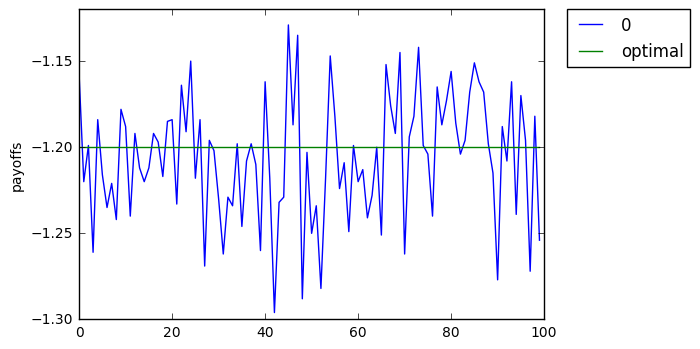

In [92]:
for i,c in enumerate(comp):
    payoffs = [np.array([f['total'] for f in e.agent.feedbacks]) for e in c.experiments]
    avg_payoffs = sum(payoffs, np.zeros(len(payoffs[0]))) / len(payoffs)
    plt.plot(avg_payoffs, label = str(i))
plt.plot([-1.2 for i in range(100)], label="optimal")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.ylabel('payoffs')
plt.show()